<h1>
<center>
Module 1: Bag of Chars and KNN (K Nearest Neighbor)
</center>
</h1>
<div class=h1_cell>

<p>In this assignment, I'll ask you to do a bit more data wrangling (AKA feature engineering) and to help implement KNN.
<p>
</div>

First, run the code below. We will use it a little later. It allows us to do some things with type hints.

In [0]:
import pandas as pd
from typing import TypeVar, Callable
dframe = TypeVar('pd.core.frame.DataFrame')


<hr>
<h1>
Challenge 1: use url to access your tables
</h1>
At the end of the content notebook, I had you write out the wrangled table to Google Drive. It's a bit of a pain to read that back in directly. Instead, you can get the url from your table on Google Drive and use it to read in your table. Please do so. I went through the following steps.

1. Opened Google Drive and found my `name_table.csv` file.
2. Right-click on file and open with Sheets.
3. Under File clicked Publish to web.
4. Replaced Web Page with csv.
5. Clicked Publish and copied url.
6. Pasted url as string below.
7. Used pandas to read it in. Cool.


In [0]:
#should have form https://docs.google.com/spreadsheets...?output=csv

url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQcXKxd9DPp8sdA-9kR9SOLGMRL2NIO1HSGx6NZ3FQt-aIeCu28wxiZGxAtRbsetsQL1aUj3CfZ-HeP/pub?output=csv'


In [0]:
name_table = pd.read_csv(url)
len(name_table)


891

In [0]:
pd.set_option('display.max_columns', None)  #allows you to see entire text in a column

In [0]:
name_table.head(1)

,Name,Survived,Length
0,"Braund, Mr. Owen Harris",0,23


<hr>
<h1>
Challenge 2: bag of chars
</h1>
<div class=h1_cell>
<p>
  Our goal is to run something called K Nearest Neighbor (KNN) on the name_table. The purpose of KNN is, given a row we want to know something about (I'll call it the target row), find other rows that are similar to it. I suppose it is a bit like trying to find a good Italian restaurant by saying "who in this crowd likes Italian food?. Then asking who ever raises their hand for a recommendation of a good restaurant. You could take a vote among the recommenders. That is not a totally accurate analogy but is close.
  <p>
    The crowd we will ask questions of are the rows in name_table. I guess you could call it the row-crowd. What we want to know (i.e., our restaurant recommendation) is the `Survived` column. In essence, we will ask our expert rows what value they have for Survived. We will tally their values and use
    majority wins. If our experts say yes (actually a 1), then that' will be the value we will use. How do these experts get identified? We are coming to that.
    <p>
      The problem at the moment is that we don't have much to go on in terms of identifying our experts. The only column we have is `Length`. It would be similar to us asking our dining-out crowd "who in this crowd goes out to eat?". It is helpful but would be better if we had more information to filter on. So let's add some more features. We will see a technique called bag-of-words in a future module. The general idea is to collect together all the words you see in a set of documents and give each a unique integer id. Then add  columns labeled with the word ids and the cells with their counts. In this challenge, I want you to try bag-of-characters (I just made that name up - I might trademark it). I want 26 new columns, one for each letter. For each row['Name'], I want a count of how many times each letter appears in the name. You could do this the tedious way and have 26 separate pieces of code. What I want to see is a loop that does it for you.
<p>
Please wrangle the Name string into lowercase. I think this is an iffy decision. It may be that uppercase letters carry information. Normalizing to lowercase washes that information out. It would really be no problem to have 52 new columns for upper and lower case. Or even add columns for punctuation. Adding columns is cheap and easy. But we will use lowercase for now. And remove punctuation.
<p>
To remind you of what we did in content notebook:
<pre>
<code>
name_table['Length'] = name_table.apply(lambda row: len(row['Name']), axis=1)
</code>
</pre>
<p>
What you need is to do the same for 26 new columns. You will have to do something other than taking the length. And please use a loop.
</div>

In [0]:
#your loop here
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

def mein_counter(row_name, cur_alphabet):
  n = 0
  for i in row_name.lower():
    if i == cur_alphabet:
      n += 1
  return n

for i in alphabet:
  name_table[i] = name_table.apply(lambda row: mein_counter(row['Name'], i), axis=1)


In [0]:

name_table.head()  #see my results in textbox below

,Name,Survived,Length,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,"Braund, Mr. Owen Harris",0,23,2,1,0,1,1,0,0,1,1,0,0,0,1,2,1,0,0,4,1,0,1,0,1,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,51,2,2,2,1,4,1,3,2,2,1,0,2,2,3,2,0,0,5,3,1,1,0,0,0,2,0
2,"Heikkinen, Miss. Laina",1,22,2,0,0,0,2,0,0,1,4,0,2,1,1,3,0,0,0,0,2,0,0,0,0,0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,44,3,0,1,0,6,1,0,2,1,1,0,5,2,0,0,1,1,2,2,2,2,0,0,0,2,0
4,"Allen, Mr. William Henry",0,24,2,0,0,0,2,0,0,1,2,0,0,4,2,2,0,0,0,2,0,0,0,0,1,0,1,0


Here are my results:
<img src='https://www.dropbox.com/s/ak32t1bgtullb5m/Screenshot%202019-12-18%2013.08.41.png?raw=1'>

<div class=h1_cell>
<p>
If your values don't match mine, make sure you are working with the lowercase version of the name.
  <p>
    Finally, let's get rid of the `Name` column. We do not need it anymore.
</div>

In [0]:
name_table = name_table.drop(['Name'], axis=1)

<h2>Challenge 3</h2>

I'd like to split up our data into what is called a test set and a training set. Let's pull out 100 random rows from name_table to act as our test table. And then use the remaining 791 as our training table. I am going to call the training table the "crowd table" to make it a bit more clear how it is being used in KNN. And before doing that, I am going to set a seed for the random number generator so we all get the same results. And I am going to have to bring in the numpy library to do that. Numpy is a hugely useful library that we may use more extensively in the future.

In [0]:
import numpy as np
rsgen = np.random.RandomState(1234)  #using same seed, we should all now get the same random shuffling

OK, the hard part. I'd like you to generate the two tables so they match mine exactly. I am going to give you a hint on how to do this. We want 100 random rows, right. Here is my cool idea. First, shuffle the rows in the name_table randomly. You won't find a pandas method called "shuffle" but you will find another pandas method that does what you want.
<p>
  Once you have the table shuffled, slice it to get first 100 rows and last 791 rows. Hint: slicing works for tables the same it works with plain old Python lists. You are now almost done. Final step is to reset the table index starting at 0 and counting up. And for both tables.

All of this is my way of leading you into the pandas documentation. You will need to refer to it often in coming weeks. Learn how to google!

In [0]:
#shuffle table
#Hint: you will need to include a parameter that tells pandas to use rsgen when randomly doing things

shuffled_table = name_table.sample(n=len(name_table), random_state=rsgen)

In [0]:
#get 2 slices

test_table = shuffled_table[:100]
crowd_table = shuffled_table[100:]

In [0]:
#reset index for both

test_table = test_table.reset_index(drop=True)
crowd_table = crowd_table.reset_index(drop=True)

In [0]:
test_table.head()

,Survived,Length,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,1,47,4,1,2,1,2,1,0,4,5,0,0,2,1,0,2,3,0,3,4,1,1,0,0,0,0,0
1,0,23,2,0,0,0,0,0,1,1,1,1,1,1,2,3,2,0,0,1,1,1,0,0,0,0,0,0
2,0,18,1,0,0,0,0,1,1,2,1,1,0,0,1,1,1,0,0,3,0,1,0,0,0,0,0,0
3,1,30,1,1,0,0,4,0,0,1,3,0,0,1,2,0,0,0,0,0,6,2,2,0,0,0,1,1
4,0,19,0,0,0,0,0,0,1,2,0,1,0,0,1,1,3,0,0,2,2,0,1,0,0,0,0,0


Here is your test target. If yours is different, see my hint above.
<p>
  <img src='https://www.dropbox.com/s/24pih1kns62sqz0/Screenshot%202019-03-26%2012.06.40.png?raw=1'>

In [0]:
crowd_table.head()

,Survived,Length,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z
0,0,23,3,1,0,1,2,1,0,0,0,0,1,0,2,2,0,0,0,4,0,1,0,0,0,0,0,0
1,1,65,5,0,2,4,2,2,2,2,3,0,0,5,2,4,3,0,0,5,3,2,3,0,0,0,1,0
2,1,19,2,0,1,0,2,0,0,1,2,0,0,1,2,1,0,0,0,1,2,0,0,0,0,0,0,0
3,1,22,2,0,0,0,2,0,0,1,3,0,1,1,1,4,1,0,0,0,2,0,0,0,0,0,0,0
4,0,29,2,1,1,2,4,2,0,0,2,1,1,1,2,1,0,0,0,3,1,0,0,0,0,0,0,0


Here is your crowd table target:
<p>
    <img src='https://www.dropbox.com/s/mt76rcznoh9cjq4/Screenshot%202019-03-26%2012.07.59.png?raw=1'>


<h2>Challenge 4</h2>
<p>

<p>
  So here is what we will do. We will take rows from test_table and pretend we don't know the value of their `Survived` column. Let's assume we have selected a row from the test_table to be our target. We will ask the rows in our crowd_table what they think the `Survived` value should be for target. But there are 791 rows in the crowd. Should we ask all of them? Nope. We will only ask k. But which k? How about the k rows in the crowd that are "closest" to the target. Next question: how do you judge closeness? It gets a little mathy here. I will treat each row as a 27 element vector. And I will use euclidean-distance between 2 vectors to find the closest.
  <p>
I'll guide you through a little example. First, let's choose the first row (has 0 index) from the test_table. We will make that our target row.



In [0]:
target_row = test_table.iloc[0]  #just for testing

For this example, let's compare the target row against the fist row in the crowd

In [0]:
crowd_row = crowd_table.iloc[0]

  Imporant point! When you pull a row from a dataframe, you get a pandas Series object. A Series object can be kind of slippery. Sometimes it acts like a dictionary. Sometimes is acts like a list. Let me show you.

In [0]:
type(target_row)  #yes, it is a Series object

pandas.core.series.Series

In [0]:
target_row['a']  #acts like a dictionary using column names as keys

4

In [0]:
target_row[2]  #acts like a list using normal indexing

4

ok, now produce 2 vectors that contain the 27 values. It is fine if you use a plain old list to represent your vectors. And as you might guess, yes, there is a method to turn a Series object into a list.


In [0]:
target_vector = target_row.tolist()[1:]
print(target_vector)  #[47, 4, 1, 2, 1, 2, 1, 0, 4, 5, 0, 0, 2, 1, 0, 2, 3, 0, 3, 4, 1, 1, 0, 0, 0, 0, 0]

[47, 4, 1, 2, 1, 2, 1, 0, 4, 5, 0, 0, 2, 1, 0, 2, 3, 0, 3, 4, 1, 1, 0, 0, 0, 0, 0]


In [0]:
crowd_vector = crowd_row.tolist()[1:]
print(crowd_vector)  #[23, 3, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0]

[23, 3, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0]


Good job. Now define a function that takes 2 vectors as input and returns the euclidean distance between them. Just as reminder:
<p>
  <p>
<img src='https://www.dropbox.com/s/9wao0kf3u32i3e9/euclidian.png?raw=1'>


###Variable Typing (both static and dynamic)

I am going to show you how to use type hints and asserts for your functions. As you know, type hints are used on the signature line of the function. Their benefit is in documentation. They are not enforced unless you use a separate type-checking/linting tool. And as far as I know, no such tools will run easily in a jupyter notebook. But still, they are way useful as documentation.

Asserts are the way we can actually check typing and other constraints on the values being passed, but at runtime.

In [0]:
def euclidean_distance(vect1:list ,vect2:list) -> float:
  assert isinstance(vect1, list), f'vect1 is not a list but a {type(vect1)}'
  assert isinstance(vect2, list), f'vect2 is not a list but a {type(vect2)}'
  assert len(vect1) == len(vect2), f"Mismatching length for euclidean vectors: {len(vect1)} and {len(vect2)}"

  #rest of your code below
  cur_value = 0
  for i in range(len(vect1)):
    cur_value += np.square(vect1[i]-vect2[i])
  return np.sqrt(cur_value)


In [0]:
euclidean_distance(target_vector, crowd_vector)  #25.748786379167466

25.748786379167466

Ok, how about this. Create a list of the distances from the target_vector to all of the rows in the crowd_table. And store the row index from the crowd_table. We will end up with a list of pairs. I show the first 10 below.

In [0]:
#please use iterrows

distance_list = [(index, euclidean_distance(target_vector, crowd_table.iloc[index].tolist()[1:])) for index,row in crowd_table.iterrows()]

distance_list[:10]

[(0, 25.748786379167466),
 (1, 19.87460691435179),
 (2, 28.91366458960192),
 (3, 26.30589287593181),
 (4, 19.72308292331602),
 (5, 10.44030650891055),
 (6, 29.29163703175362),
 (7, 14.628738838327793),
 (8, 23.49468024894146),
 (9, 16.3707055437449)]

Here is your target. It says row 0 in crowd had ED from target of 25.74, row 1 in crowd had ED of 19.87, etc.

<img src='https://www.dropbox.com/s/i8jm8563u30bmtu/Screenshot%202019-03-26%2012.09.53.png?raw=1'>

Now let's sort the list with smallest distance first - if a distance is small that is good. It means the crowd row was close to the target row. The tricky part is doing the sorting on the 2nd item of the pair, i.e., the distance. Hint: see about using the `key=` parameter.

In [0]:
#figure out how to sort the list on distance

def sortSecond(val):
  return val[1]

distance_list.sort(key = sortSecond)
sorted_crowd = distance_list
sorted_crowd[:10]

[(248, 6.324555320336759),
 (351, 6.557438524302),
 (93, 6.6332495807108),
 (688, 6.6332495807108),
 (593, 6.855654600401044),
 (221, 6.928203230275509),
 (265, 7.0710678118654755),
 (536, 7.0710678118654755),
 (620, 7.14142842854285),
 (70, 7.280109889280518)]

Here is your target.<br>
<img src='https://www.dropbox.com/s/6bw18yee376mrud/Screenshot%202019-03-26%2012.11.16.png?raw=1'><br>
Looks like row 248 in the crowd table is closest to the target row.
<p>
  What's next? We need to get the opinions of the top k. Getting the top k is easy peasy.

In [0]:
k = 5  #a typical value

top_k = [i for i,d in sorted_crowd[:k]]
top_k

[248, 351, 93, 688, 593]

We've thinned the crowd to 5. Now all we need are their 5 opinions. We will need to go back to the crowd_table to get those.

In [0]:
#get the opinions of top 5

opinions = [crowd_table.loc[i, 'Survived'] for i in top_k]

opinions    #[1, 1, 1, 0, 1]             

[1, 1, 1, 0, 1]

We have a divided set of experts. Four think the answer should be 1 (i.e., survived) and one thinks the answer should be 0 (i.e., perished). The rule we will follow is majority rules with ties going to 0 (arbitrarily). Can you get ties? Yes. Think if you would have set k=6 instead of 5. Could get top_k evenly split 3-3.
<p>
  Important point! For now you can assume that the answer we want is binary, i.e., 0 or 1. The `Survived` column is of this form so we are good to go. Later we may have to wrangle other tables to get prediction value into binary form.

In [0]:
winner = 1 if opinions.count(1) > opinions.count(0) else 0
winner  #1 i.e., we are predicting survival for target_row = test_table.iloc[0] based on 5 experts

1

<h2>Challenge 5</h2>

I'd like you to create a knn function. But first let's build some pieces. Define a function `ordered_distances` that takes as parameters a target vector, a crowd table, the column we want an answer for and the distance function we will use - next week we will try another distance function. It returns a list of pairs where each pair is (row_id, distance). Oh yes, it is also sorted by distance before being returned.
<p>
  Once we have this list, we can slice off the first k to get our experts.

  Important note: I cannot use dframe with isinstance. It produces an error. I have to use the longhand pd.core.frame.DataFrame. So dframe only works with type hints on the signature line. Sigh.

In [0]:
def ordered_distances(target_vector:list, crowd_table:dframe, answer_column:str, dfunc:Callable) -> list:
  assert isinstance(target_vector, list), f'target_vector not a list but instead a {type(target_vector)}'
  assert isinstance(crowd_table, pd.core.frame.DataFrame), f'crowd_table not a dataframe but instead a {type(crowd_table)}'
  assert isinstance(answer_column, str), f'answer_column not a string but instead a {type(answer_column)}'
  assert callable(dfunc), f'dfunc not a function but instead a {type(dfunc)}'
  assert answer_column in crowd_table, f'{answer_column} is not a legit column in crowd_table - check case and spelling'

  #your code goes here
  distance_list = [(index, dfunc(target_vector, crowd_table.iloc[index].tolist()[1:])) for index,row in crowd_table.iterrows()]
  distance_list.sort(key = sortSecond)
  return distance_list

In [0]:
ordered_distances(target_vector, crowd_table, 'Survived', euclidean_distance)[:10]  #note only taking first 10 out of 791

[(248, 6.324555320336759),
 (351, 6.557438524302),
 (93, 6.6332495807108),
 (688, 6.6332495807108),
 (593, 6.855654600401044),
 (221, 6.928203230275509),
 (265, 7.0710678118654755),
 (536, 7.0710678118654755),
 (620, 7.14142842854285),
 (70, 7.280109889280518)]

Here is your target.<br>
<img src='https://www.dropbox.com/s/0bcbojwx6gu7lj4/Screenshot%202019-03-26%2012.17.53.png?raw=1'><br>

Ok, ready for knn. I'll give you the skeleton and you fill it in.

In [0]:
def knn(target_vector:list, crowd_table:dframe, answer_column:str, k:int, dfunc:Callable) -> int:
  assert isinstance(target_vector, list), f'target_vector not a list but instead a {type(target_vector)}'
  assert isinstance(crowd_table, pd.core.frame.DataFrame), f'crowd_table not a dataframe but instead a {type(crowd_table)}'
  assert isinstance(answer_column, str), f'answer_column not a string but instead a {type(answer_column)}'
  assert answer_column in crowd_table, f'{answer_column} is not a legit column in crowd_table - check case and spelling'
  assert crowd_table[answer_column].isin([0,1]).all(), f"answer_column must be binary"
  assert callable(dfunc), f'dfunc not a function but instead a {type(dfunc)}'

  #your code goes here
  
  top_k = [i for i,d in ordered_distances(target_vector, crowd_table, answer_column, dfunc)[:k]]
  opinions = [crowd_table.loc[i, answer_column] for i in top_k]
  winner = 1 if opinions.count(1) > opinions.count(0) else 0
  return winner


In [0]:
knn(target_vector, crowd_table, 'Survived', 5, euclidean_distance) #should be 1

1

<h2>Challenge 6</h2>

Good job. You now have a knn predictor. If you give it a vector of 27 integers, and a crowd of rows waiting to weigh in, it will give you an answer.
<p>
  The remaing thing left to do is to test how well it works for this problem. To do testing, we will ask knn to give us an answer for every row in test_table. We will compare that answer against the correct answer. If they match, we give ourselves a point.
  <p>
    I'm going to ask you to build a knn_tester function. This will make it easier to try different values of k to see if that matters. BTW: k is called a hyper-parameter. Finding good values for hyper-parameters becomes a whole course on its own. Consider taking CIS472 for more details.

In [0]:
def knn_tester(test_table:dframe, crowd_table:dframe, answer_column:str, k:int, dfunc:Callable) -> float:
  assert isinstance(test_table, pd.core.frame.DataFrame), f'test_table not a dataframe but instead a {type(test_table)}'
  assert isinstance(crowd_table, pd.core.frame.DataFrame), f'crowd_table not a dataframe but instead a {type(crowd_table)}'
  assert isinstance(answer_column, str), f'answer_column not a string but instead a {type(answer_column)}'
  assert answer_column in crowd_table, f'{answer_column} is not a legit column in crowd_table - check case and spelling'
  assert crowd_table[answer_column].isin([0,1]).all(), f"answer_column must be binary"
  assert callable(dfunc), f'dfunc not a function but instead a {type(dfunc)}'

  #your code goes here
  amt = len(test_table)
  collection = 0
  for index,row in test_table.iterrows():
    if knn(test_table.iloc[index].tolist()[1:], crowd_table, answer_column, k, dfunc) == test_table.loc[index, answer_column]:
      collection += 1
  return np.divide(collection, amt)


Before we test things out, just a reminder. The knn function itself is `O(n)`. Once we start testing, we climb to `O(n**2)`. Well, really `O(100*n)` but close enough. You will feel the bite of this now. Took me about a minute on colab.

In [0]:
%%time

accuracy = knn_tester(test_table, crowd_table, 'Survived', 5, euclidean_distance)

print(accuracy)  #0.68

0.68
CPU times: user 19.8 s, sys: 10.3 ms, total: 19.8 s
Wall time: 19.8 s


Using the crowd_table and a value of k=5, we were 68% accurate on predicting the value of the Survived column for the 100 rows in test_table. That is not very good. Why? Watch this.

In [0]:
test_table['Survived'].sum()  #count the 1s in the column

40

In essence, I can get 60% correct just by guessing not 1, i.e., 0. So we improved by 8%.
<p>
Let's see if we use a larger set of experts gives us better results.

In [0]:
knn_tester(test_table, crowd_table, 'Survived', 11, euclidean_distance)  #crowd size of 11 - 0.72

0.72

<div class=h1_cell>
We are doing better. Let's try one more.
</div>

In [0]:
knn_tester(test_table, crowd_table, 'Survived', 15, euclidean_distance)  #crowd size of 15 - 0.76

0.76

Ok, just one more.

In [0]:
knn_tester(test_table, crowd_table, 'Survived', 21, euclidean_distance)  #crowd size of 21 - 0.74

0.74

Heading back down. But stop and think about this. When using k=15, we are getting over 15% higher than guessing 0 by using the characters in the name and its length. Kind of weird if you ask me. It's like we are standing at the gangplank leading to the ship and ask each passenger just their name. From that, we advise them to board or take a plane instead. And we would be at least 76% accurate.
<p>
  Sorry, I have to follow this analogy further. It would be like I was at the gangplank with a crowd of 791 other passengers. Crowded! Then when a new person arrived, I would shout out his or her name. 15 would step forward saying they have a name similar to the new person. They would then vote on whether the person should board or not. I think I could make a Marx Brothers movie out of it.
  <br>
  <img src='https://d2ycltig8jwwee.cloudfront.net/features/295/fullwidth.504cf584.jpg' height=200>

<h2>Challenge 7</h2>

The field of data science and machine learning has decided that simple accuracy is not the whole picture in terms of how good KNN (or any machine-learning model) is. They have broken out results into what is called a confusion matrix. Maybe because it is so confusing to look at!


<img src='https://www.dropbox.com/s/zubecbzi8zsdzgg/confusion_matrix.png?raw=1'>


The thing to notice are the 4 cells True positive, False positive, False negative and True negative. Once you have these, all the other measures around the sides can be computed from these 4.
<p>
  So our challenge is to compute those 4. At the moment, knn_tester only computes Accuracy (see top right corner). I'd like you to modify it to return, instead, the 4 key cells. Then we can use those to compute many strange and wondrous things.

Please copy your version of knn_tester from challenge 6 and modify it to return the 4 cases.
</div>

In [0]:
#second version

def knn_tester(test_table, crowd_table, answer_column, k, dfunc:Callable) -> dict:
  assert isinstance(test_table, pd.core.frame.DataFrame), f'test_table not a dataframe but instead a {type(test_table)}'
  assert isinstance(crowd_table, pd.core.frame.DataFrame), f'crowd_table not a dataframe but instead a {type(crowd_table)}'
  assert isinstance(answer_column, str), f'answer_column not a string but instead a {type(answer_column)}'
  assert answer_column in crowd_table, f'{answer_column} is not a legit column in crowd_table - check case and spelling'
  assert crowd_table[answer_column].isin([0,1]).all(), f"answer_column must be binary"
  assert callable(dfunc), f'dfunc not a function but instead a {type(dfunc)}'
  
  #your code here
  collection = {(0, 0): 0, (0, 1): 0, (1, 0): 0, (1, 1): 0}
  for index,row in test_table.iterrows():
    node = (knn(test_table.iloc[index].tolist()[1:], crowd_table, answer_column, k, dfunc), test_table.loc[index, answer_column])
    for i in collection:
      if node == i:
        collection[i] += 1
  return collection


In [0]:
cdict = knn_tester(test_table, crowd_table, 'Survived', 15, euclidean_distance)  #crowd size of 15
cdict #{(0, 0): 54, (0, 1): 18, (1, 0): 6, (1, 1): 22}

{(0, 0): 54, (0, 1): 18, (1, 0): 6, (1, 1): 22}

Now we can derive all the measures around the edges. Here is accuracy.

In [0]:
def cm_accuracy(confusion_dictionary: dict) -> float:
  assert isinstance(confusion_dictionary, dict), f'confusion_dictionary not a dictionary but instead a {type(confusion_dictionary)}'
  
  tp = confusion_dictionary[(1,1)]
  fp = confusion_dictionary[(1,0)]
  fn = confusion_dictionary[(0,1)]
  tn = confusion_dictionary[(0,0)]
  
  return (tp+tn)/(tp+fp+fn+tn)

In [0]:
cm_accuracy(cdict)  #0.76

0.76

Sometimes it helps to visualize the 4 cases. I'll use a pie chart. Just one line of code will do it. Note that I turn cdict (a dictionary) into a Series that then allows us to use `plot.pie`.

In [0]:
import matplotlib
%matplotlib inline

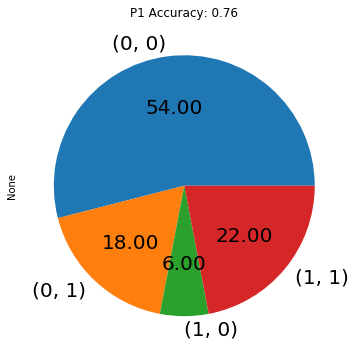

In [0]:
pd.Series(cdict).plot.pie(title='P1 Accuracy: '+str(cm_accuracy(cdict)), autopct='%.2f', fontsize=20, figsize=(6, 6))  # need figsize to get correct aspect


You can see that we have triple the false-negatives than the false-positives. This may matter for some problems. Maybe false-negatives have a high-cost so we want to shrink its pie slice maybe by increasing the false-positive slice.

There is one more measure from the confusion matrix that is worth mentioning, that of F1 (bottom right). You will see it used often when analyzing how good a predictive model is. Why? Google around and you will find arguments for it.
<p>
  Note that division by 0 can happen with F1 so I added a bunch of guards to avoid it. I am calling these heuristics because it is not totally clear what you want to do when you get a 0 denominator. I am just treating the fraction as 0.

In [0]:
def cm_f1(confusion_dictionary: dict) -> float:
  assert isinstance(confusion_dictionary, dict), f'confusion_dictionary not a dictionary but instead a {type(confusion_dictionary)}'
  
  tp = confusion_dictionary[(1,1)]
  fp = confusion_dictionary[(1,0)]
  fn = confusion_dictionary[(0,1)]
  tn = confusion_dictionary[(0,0)]
  
  recall = tp/(tp+fn) if (tp+fn) != 0 else 0  #Heuristic
  precision = tp/(tp+fp) if (tp+fp) != 0 else 0  #Heuristic
  
  recall_div = 1/recall if recall != 0 else 0  #Heuristic
  precision_div = 1/precision if precision != 0 else 0  #Heuristic
  
  f1 = 2/(recall_div+precision_div) if (recall_div+precision_div) != 0 else 0  #heuristic
  
  return f1
  
  

In [0]:
cm_f1(cdict)  #0.6470588235294118

0.6470588235294118

Is an F1 score of .65 good? You will have to dig into the details of the function to get an answer. I won't be using it again in this course.

# Challenge 8: Create a library (AKA module or package) on github

We defined some functions that might be useful later. I'd like you to create a library (also called a module or package) that contains those functions. If we set things up correctly, you should be able to import your library and all the functions it contains. In this way, we can build up our library over the quarter, reusing things from past weeks. Nice.

I am going to give you a super simple way to do what you need.

1. Go to my respository https://github.com/fickas/w20_ds_library.
2. Click use this template. This should clone my repository in your own github account. So you will have something like https://github.com/smith/w20_ds_library.
3. You have a choice to make on making your repository public or private. If you make it public, you can follow my steps below as is. However, I would ask you not to share your repository with others. I expect all students to create and maintain their own repositories. If you make your repository private,  then add me as a collaborator by going to settings and then collaborators. My github name is just plain fickas. Warning: to clone a private repository takes more work. See this stackoverflow discussion: https://stackoverflow.com/questions/48350226/methods-for-using-git-with-google-colab.
4. Optionally, clone your github repostitory to your local machine. This will set it up as a git folder.
5. Add the  functions we defined this week to your library.

Why is step 4 optional? Because you could choose to just maintain your file on github. Make changes to it there without ever needing your local machine. But I think it is good practice to make changes on your local machine then use git commands to push those changes to github. Plus you can use your favorite editor and linter from your local machine. But it is up to you.

Important point: you will need to import any libraries you need at the top of the file. This is tricky. A module has its own namespace. Even if you have something like `import pandas as pd` in your main notebook, that will not be seen from your module. Your module has to be self-contained. You can see I have done this in `w20_ds_library.py`.

Finally, I can run the code below to pull down my file to colab and then import it. Pretty cool. Please show me that you can do the same.


In [0]:
#flush the old folder
!rm -r  'w20_ds_library'

In [0]:
my_github_name = 'FutureDeus'  #replace with your account name

In [0]:
clone_url = f'https://github.com/{my_github_name}/w20_ds_library.git'

I am just going to clone from master branch below. However, you can also create releases that allow you to tag places in the master history and clone from those
tagged places. I use this to tag my library weekly (as releases). At the end of the quarter, I have 10 tagged releases for the 10 weeks. When I do this, I add the `--branch` option to clone and give the tag I want.

In [0]:
#get the latest from master branch - note my repository is public so don't need authentication
!git clone $clone_url  #use option --branch w1.0 for a specific release, in this case one tagged w1.0


Cloning into 'w20_ds_library'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [0]:
from w20_ds_library  import * 

In [0]:
hello_ds()  #Big hello to you

Big hello to you


In [0]:
whos

Variable             Type            Data/Info
----------------------------------------------
Callable             CallableMeta    typing.Callable
TypeVar              TypingMeta      typing.TypeVar
accuracy             float64         0.68
alphabet             list            n=26
cdict                dict            n=4
clone_url            str             https://github.com/FutureDeus/w20_ds_library.git
cm_accuracy          function        <function cm_accuracy at 0x7fb846f0fae8>
cm_f1                function        <function cm_f1 at 0x7fb846eaf730>
crowd_row            Series          Survived     0\nLength   <...> 0\nName: 0, dtype: int64
crowd_table          DataFrame            Survived  Length  a <...>\n[791 rows x 28 columns]
crowd_vector         list            n=27
dframe               TypeVar         ~pd.core.frame.DataFrame
distance_list        list            n=791
euclidean_distance   function        <function euclidean_distance at 0x7fb846f61048>
hello_ds             f

<h1>Let's Summarize</h1>
<p>
<div class=h1_cell>
<p>
We have learned that we can use text in classification/prediction problems. We used names, but we could have also used tweets, articles or entire books. It's all text. We will see this in future modules.
<p>
We learned that we can break out text into smaller chunks and use those chunks as columns. We used characters but later we will use words.
<p>
We learned that K-NN has some good features -- it requires no training and is fairly straightforward -- and bad features -- it is slow.
<p>
Our next big goal is to classify fake news in tweets (1 if fake, 0 if real). We will look at how to break out pieces of a tweet.
</div>

<hr>
<h1>Next up</h1>

We will start to work with hate tweets.

In terms of the Numerology idea, my colleague pointed me to this web site: http://www.paulsadowski.com/Numbers.asp. If I had more time, I bet I could turn K-NN loose on that site :)
